## **Resumo**

#### O dataset utilizado é o 'Red Wine Quality', disponível em https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009. Se trata de um dataset com características de uma safra de vinho, e o objetivo da análise é entender quais são as características que influenciam na qualidade do vinho, além de criar um modelo que seja capaz de prever a qualidade do vinho com base nessas informações.


## **Variáveis**:
1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

## Importando as bibliotecas

In [0]:
#importando as bibliotecas necessárias para as análises e modelos
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
random.seed(42)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score, roc_auc_score, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.svm import SVC

## Leitura do dataset e criação do DataFrame

In [70]:
#criação do dataframe e armazenamento na variável 'data'
data = pd.read_csv('winequality-red.csv')

#exibindo as primeiras linhas e outras informações sobre o dataset
attributes = list(data.columns)
print('Rótulos das colunas:',attributes)
print("Número de linhas e colunas no dataset:", data.shape)
data.head()

Rótulos das colunas: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
Número de linhas e colunas no dataset: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


ERROR! Session/line number was not unique in database. History logging moved to new session 60


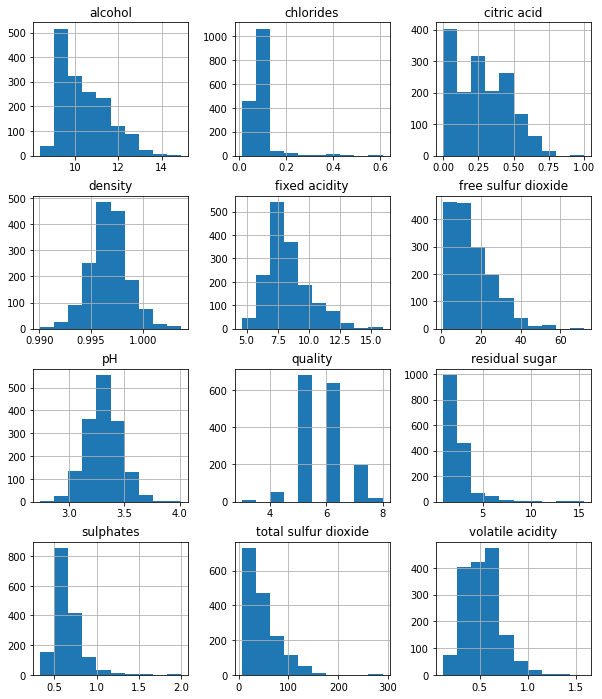

In [9]:
#plotando histograma de frequências de todas as variáveis do dataset
data.hist(figsize=(10,12))
plt.show()

In [10]:
#checando as estatísticas básicas das variáveis do dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


## 1. Pré-processamento
* Remoção de atributos faltantes
* Normalização ou padronização
* Transformação para valores numéricos (one-hot-encoding) se precisar

In [11]:
#checando informações sobre o tipo de dado e quantidade de missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
#checando a soma de missing values por coluna
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### *Como não há nenhum dado faltante e nenhuma variável categórica, vou partir diretamente para a padronização dos dados.*

In [0]:
#transformando o DataFrame em Numpy Array para melhor manipulação e transformação dos dados
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

classes = np.unique(y)

In [72]:
#normalização dos dados para evitar o efeito da escala nos atributos numéricos do dataset
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

print('Dados transformados:')
print('Media: ', np.mean(X, axis = 0))
print('Desvio Padrao:', np.std(X, axis = 0))

Dados transformados:
Media:  [ 3.55493551e-16  1.73303106e-16 -8.88733878e-17 -1.24422743e-16
  3.82155568e-16 -6.22113715e-17  4.44366939e-17 -3.47317200e-14
  2.86172309e-15  6.75437748e-16  1.06648065e-16]
Desvio Padrao: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [0]:
#análise dos principais componentes
# seleciona os dois componentes principais
pca = PCA(n_components=2)
# calcula o PCA
pca_result = pca.fit_transform(X)

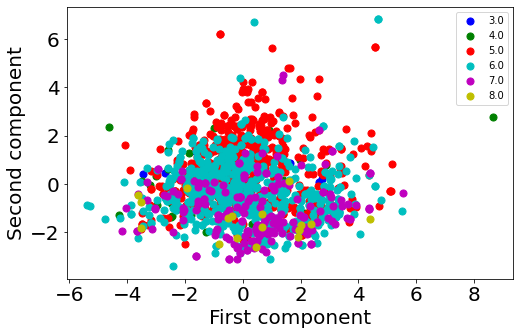

In [24]:
# visualizando graficamente a análise de PCA 
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
aux = 0
plt.figure(figsize=(8,5))
for c in classes:
    nodes = np.where(y == c)
    # mostra os dados,considerando uma cor para cada classe
    plt.scatter(pca_result[nodes,0], pca_result[nodes,1], s=50, color = colors[aux], label = c)
    aux = aux + 1
plt.legend()
plt.xlabel("First component", fontsize=20)
plt.ylabel("Second component", fontsize=20)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show(True)

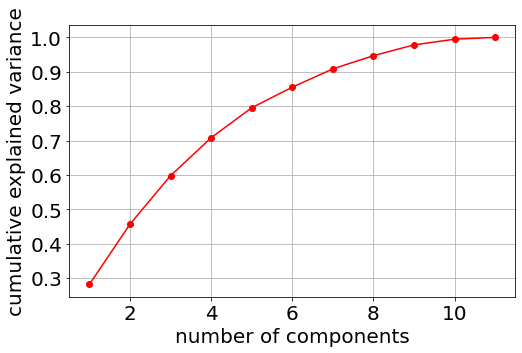

In [20]:
#checando a quantidade de componentes que explicam a maior parte da variância dos dados
pca = PCA().fit(X)
plt.figure(figsize=(8,5))
ncomp = np.arange(1, np.shape(X)[1]+1)
# mostra a variância acumulada
plt.plot(ncomp, np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('number of components', fontsize=20)
plt.ylabel('cumulative explained variance', fontsize=20);
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.grid(True)
plt.show(True)

## 2. Classificação

Classifique os vinhos de acordo com a qualidade. Compare os métodos:
* kvizinhos (encontre o melhor k usando validação cruzada)
* Árvore de decisão
* Naive Bayes
* SVM (encontre o melhor C usando validação cruzada)
* Random Forest (encontre o melhor número de estimadores usando validação cruzada)


In [0]:
#separando dados de treino e teste, com fração de elementos em 80% para treino e 20% para teste
p = 0.2
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

###*Método 2.1: KNN (K Nearest Neighbors)*

In [0]:
#aplicando o modelo inicialmente com um númro aleatório de k = 5
k = 5 # numero de vizinhos
# ajusta o modelo k-vizinhos
model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
model.fit(x_train,y_train)
# faz a predição no conjunto de teste
y_pred = model.predict(x_test) 

In [160]:
#exibindo a taxa de acurácia do modelo
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)
print('F1 score:', f1_score(y_test, y_pred, average="macro"))
print('Precision:', precision_score(y_test, y_pred, average="macro"))
print('Recall:', recall_score(y_test, y_pred, average="macro"))

Accuracy: 0.553125
F1 score: 0.2892510388162562
Precision: 0.32867901589362775
Recall: 0.2784770784770784


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


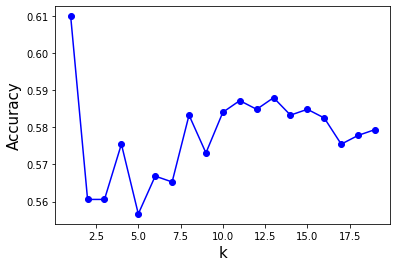

Melhor k: 1


In [35]:
#utilizando validação cruzada para definir o melhor número para k
nkf = 5
vk = []
vscore = []
for k in range(1, 20):
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    # realiza a validação cruzada
    cv = cross_validate(model, x_train, y_train, cv=nkf)
    vscore.append(cv['test_score'].mean()) 
    vk.append(k)

plt.plot(vk, vscore, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show()
best_k = np.argmax(vscore)+1
print('Melhor k:', best_k)

In [161]:
#aplicando novamente o modelo utilizando o valor de melhor k enocntrado, no caso k = 1
k = 1 # numero de vizinhos
# ajusta o modelo k-vizinhos
model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
model.fit(x_train,y_train)
# faz a predição no conjunto de teste
y_pred = model.predict(x_test) 

#exibindo a taxa de acurácia do modelo
score = accuracy_score(y_pred, y_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="macro"))
print('Precision:', precision_score(y_test, y_pred, average="macro"))
print('Recall:', recall_score(y_test, y_pred, average="macro"))

Accuracy: 0.61875
F1 score: 0.3342513959199352
Precision: 0.3377364066193853
Recall: 0.33473470973470976


###*Método 2.2: Árvore de Decisão*

Accuracy: 0.5625
F1 score: 0.301143625279296
Precision: 0.3013796097334028
Recall: 0.3012043512043512


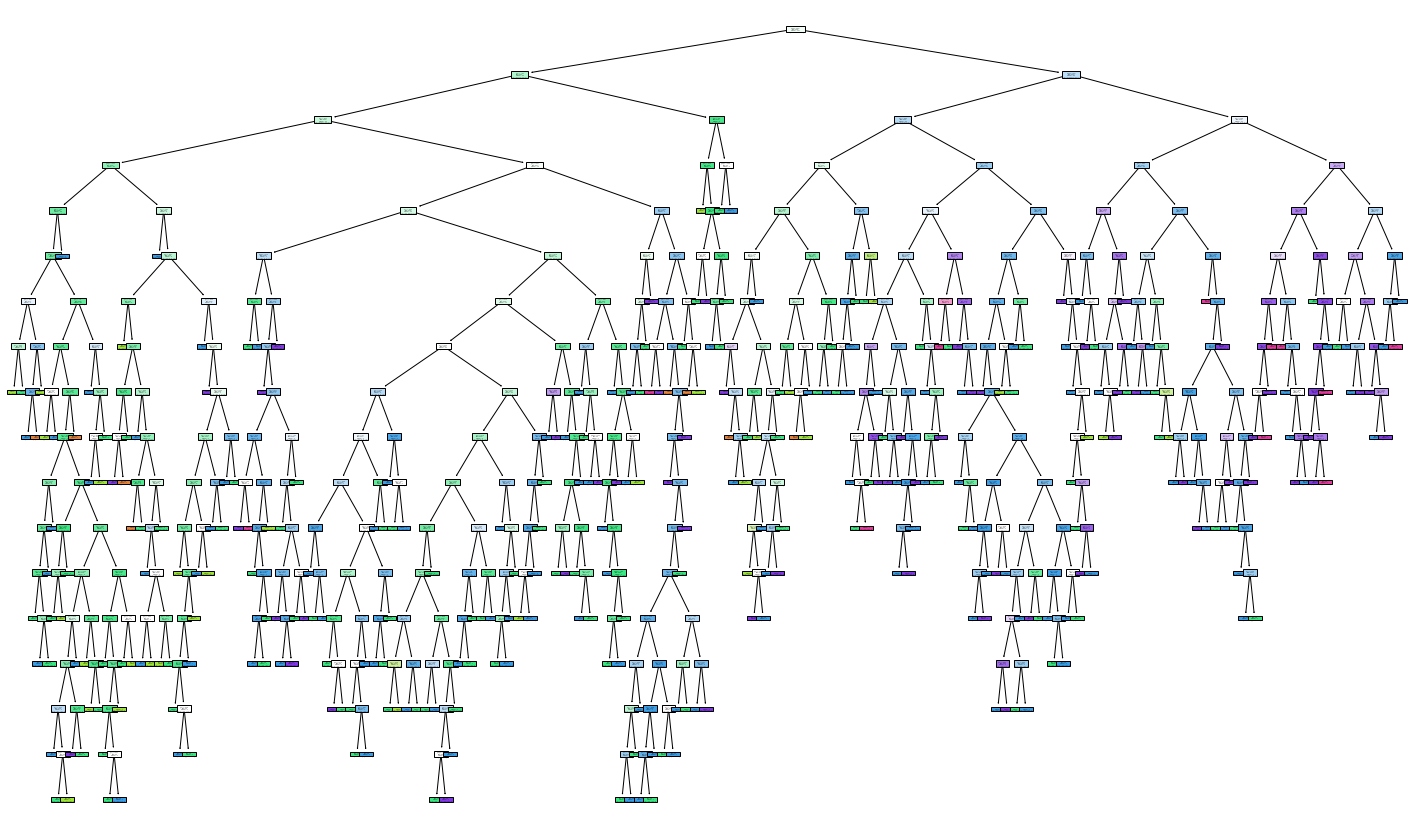

In [163]:
#aplicando o modelo e utilizando o critério 'gini'
model = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 42)
# Ajusta o modelo usando os dados de treinamento
model.fit(x_train,y_train)
# realizar a predição
y_pred = model.predict(x_test) 

#checando a acurácia desse modelo
score = accuracy_score(y_pred, y_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="macro"))
print('Precision:', precision_score(y_test, y_pred, average="macro"))
print('Recall:', recall_score(y_test, y_pred, average="macro"))

#plotando a árvore do modelo
plt.figure(figsize=(25,15))
tree.plot_tree(model.fit(x_train,y_train),filled=True)
plt.show()

Accuracy: 0.559375
F1 score: 0.32140006385696046
Precision: 0.3250212341502236
Recall: 0.3192363192363192


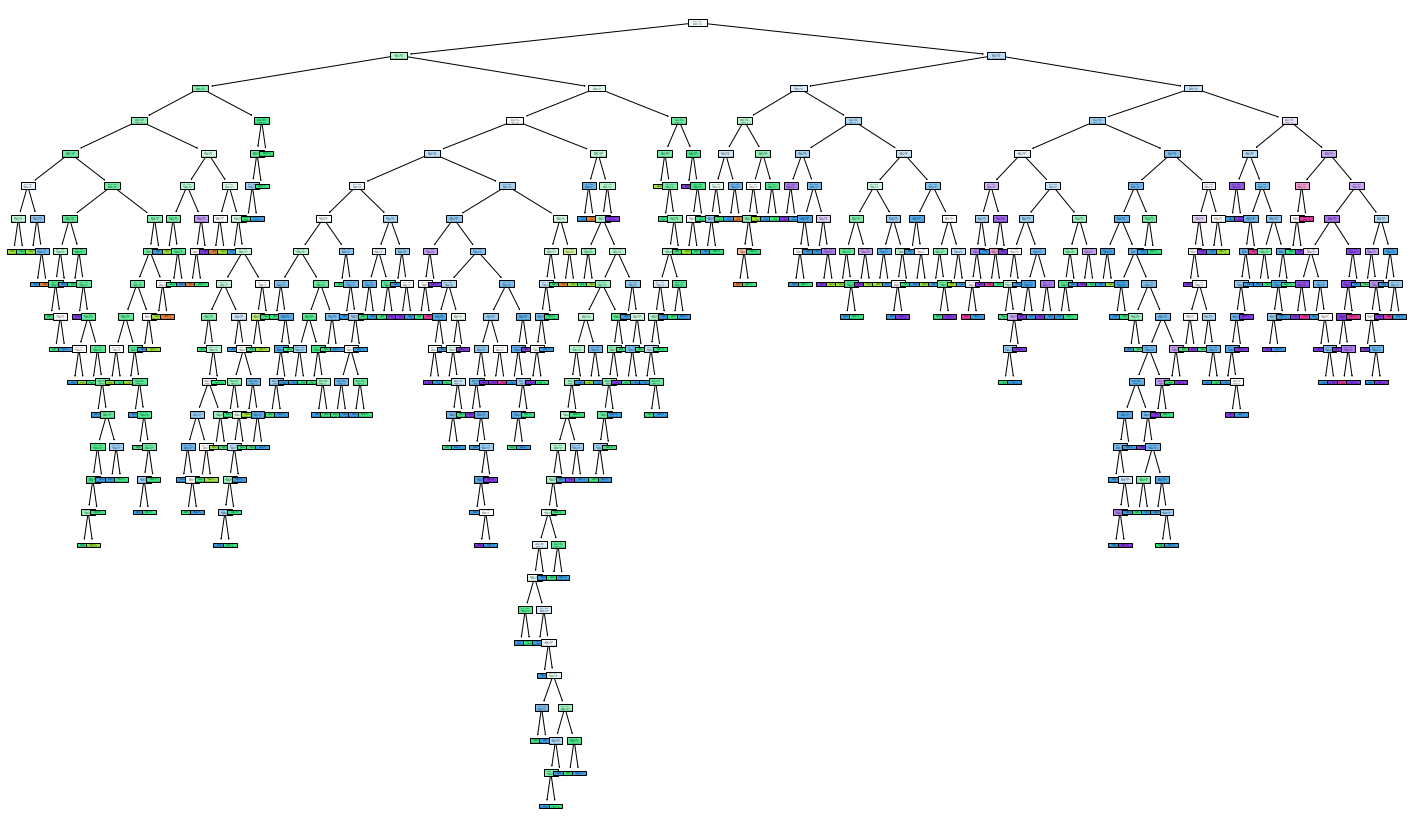

In [164]:
#aplicando o modelo novamente, dessa vez utilizando o critério de 'entropia'
model = tree.DecisionTreeClassifier(criterion = 'entropy',random_state = 42)
model.fit(x_train,y_train)
y_pred = model.predict(x_test) 

#exibindo a acurária
score = accuracy_score(y_pred, y_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="macro"))
print('Precision:', precision_score(y_test, y_pred, average="macro"))
print('Recall:', recall_score(y_test, y_pred, average="macro"))

#plotando a árvore do modelo
plt.figure(figsize=(25,15))
tree.plot_tree(model.fit(x_train,y_train),filled=True)
plt.show()

###*Método 2.3: Naive Bayes*

In [165]:
#aplicando o modelo Gaussiano, assumindo que os dados possuem uma distribuição normal
model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('Acurácia Naive Bayes (Gaussian): ', model.score(x_test, y_test))
print('F1 score:', f1_score(y_test, y_pred, average="macro"))
print('Precision:', precision_score(y_test, y_pred, average="macro"))
print('Recall:', recall_score(y_test, y_pred, average="macro"))

Acurácia Naive Bayes (Gaussian):  0.546875
F1 score: 0.310129522979618
Precision: 0.3120539628086798
Recall: 0.312962037962038


In [166]:
#aplicando o modelo Bernoulli, assumindo que os dados possuem uma distribuição diferente da normal
model = BernoulliNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('Accuracy  Naive Bayes (Bernoulli):', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="macro"))
print('Precision:', precision_score(y_test, y_pred, average="macro"))
print('Recall:', recall_score(y_test, y_pred, average="macro"))

Accuracy  Naive Bayes (Bernoulli): 0.58125
F1 score: 0.28604735578265483
Precision: 0.277869477685661
Recall: 0.2962370962370962


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### *Método 2.4: SVM (Support Vector Machine)*

No caso desse modelo específico, para resumir o índice de qualidade em um problema de duas classes, vou criar uma nova coluna para dividir e armazenar da seguintes maneira:
* índices de qualidade entre 1 a 4 = classe 0
* índices de qualidade entre 4 e 8 = classe 1

In [151]:
#criação do dataframe e armazenamento na variável 'data'
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [152]:
#função que cria uma coluna 'classe' para dividir vinhos de qualidade até 4 como classe 0, e os demais, de qualidade superior a 4, iguais a classe 1.
def col_classe(dataset):
    dataset['classe'] = ''
    
    for i in dataset.index:
        if dataset.loc[i, 'quality'] <= 4:
            dataset.loc[i, 'classe'] = 0
        if dataset.loc[i, 'quality'] > 4:
            dataset.loc[i, 'classe'] = 1
    
    return dataset

data = col_classe(data) 
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,classe
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [0]:
#exibindo as primeiras linhas e outras informações sobre o dataset
attributes = list(data.columns)

#transformando o DataFrame em Numpy Array para melhor manipulação e transformação dos dados
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]
classes = np.unique(y)
y = np.array(y).astype(int)

#normalização dos dados para evitar o efeito da escala nos atributos numéricos do dataset
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

#separando dados de treino e teste, com fração de elementos em 80% para treino e 20% para teste
p = 0.2
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

Melhor c: 2  AUC: 0.9511904761904761


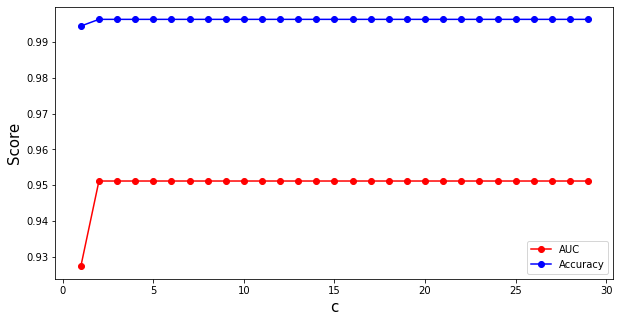

In [156]:
#aplicando o modelo e encontrando o melhor valor para c
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

mauc = []
macc = []
vc = []
for c in range(1, 30):
    vauc = []
    vacc = []
    for train_index, test_index in cv.split(X, y):
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = SVC(C = c)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test) 
        score = accuracy_score(y_pred, y_test)

        vauc.append(roc_auc_score(y_test, y_pred))
        vacc.append(accuracy_score(y_pred, y_test))
    macc.append(np.mean(vacc))
    mauc.append(np.mean(vauc))
    vc.append(c)
 
best_c = np.argmax(mauc)+1
print('Melhor c:', best_c, ' AUC:',mauc[best_c-1])
plt.figure(figsize=(10,5))
plt.plot(vc, mauc, '-ro', label= 'AUC')
plt.plot(vc, macc, '-bo', label = 'Accuracy')
plt.xlabel('c', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.legend()
plt.show()

In [157]:
#checando as métricas do modelo
model = SVC(C = best_c, gamma = 'auto')
model.fit(x_train, y_train)
y_pred = model.predict(x_test) 

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="macro"))
print('Precision:', precision_score(y_test, y_pred, average="macro"))
print('Recall:', recall_score(y_test, y_pred, average="macro"))

Accuracy: 0.9937106918238994
F1 score: 0.9529167900503406
Precision: 0.9967532467532467
Recall: 0.9166666666666667


###*Método 2.5: Random Forest*

In [75]:
# define os parâmetros do modelo
model=RandomForestClassifier(n_estimators=100, bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_jobs=1,
            oob_score=False, random_state=42, verbose=0,
            warm_start=False)
model.fit(x_train,y_train)

#aplicação do modelo
y_pred = model.predict(x_test)
score = accuracy_score(y_pred, y_test)

print('Accuracy:', score)
print('F1 score:', f1_score(y_test, y_pred, average="macro"))
print('Precision:', precision_score(y_test, y_pred, average="macro"))
print('Recall:', recall_score(y_test, y_pred, average="macro"))

Accuracy: 0.65
F1 score: 0.3234525161825427
Precision: 0.32514868961283144
Recall: 0.324014874014874


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Number of Estimators: 1 Accuracy: 0.540625
Number of Estimators: 11 Accuracy: 0.65625
Number of Estimators: 21 Accuracy: 0.659375
Number of Estimators: 31 Accuracy: 0.65625
Number of Estimators: 41 Accuracy: 0.6625
Number of Estimators: 51 Accuracy: 0.6875
Number of Estimators: 61 Accuracy: 0.671875
Number of Estimators: 71 Accuracy: 0.675
Number of Estimators: 81 Accuracy: 0.65625
Number of Estimators: 91 Accuracy: 0.66875
Number of Estimators: 101 Accuracy: 0.66875
Number of Estimators: 111 Accuracy: 0.675
Number of Estimators: 121 Accuracy: 0.653125
Number of Estimators: 131 Accuracy: 0.659375
Number of Estimators: 141 Accuracy: 0.646875
Melhor n: 51  com acurácia: 0.6875


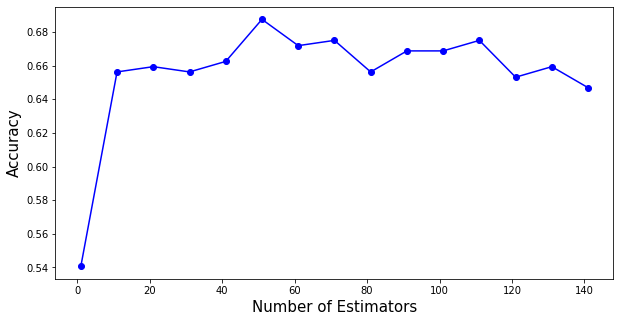

In [77]:
#verificando o melhor número de estimadores e suas respectivas acurácias
vscore = []
vn = []
for n in range(1,150,10):
    model = RandomForestClassifier(n_estimators=n)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test) 
    score = accuracy_score(y_pred, y_test)
    print('Number of Estimators:', n, 'Accuracy:', score)
    vscore.append(score)
    vn.append(n)
best_n = vn[np.argmax(vscore)]
print('Melhor n:', best_n, ' com acurácia:', vscore[np.argmax(vscore)] )
plt.figure(figsize=(10,5))
plt.plot(vn, vscore, '-bo')
plt.xlabel('Number of Estimators', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show()

## 3. Ordenação dos atributos

Para o algoritmo random forest, mostre a importância de cada atributo.


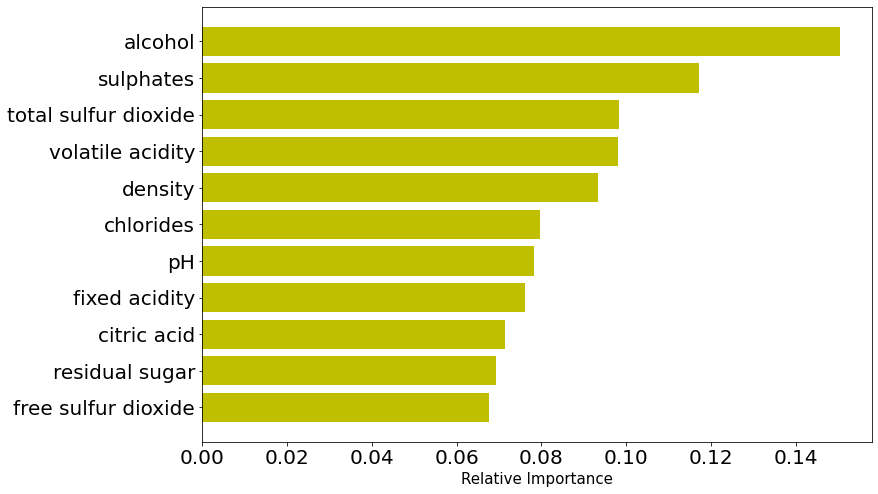

In [88]:
#exibindo os atributos das variáveis e respectivas importâncias de cada um 
importances = model.feature_importances_
indices = np.argsort(importances)
lmeas_order = []
for i in indices:
    lmeas_order.append(attributes[i])
plt.figure(figsize=(12,8))
plt.barh(range(len(indices)), importances[indices], color='y', align='center')
plt.yticks(range(len(indices)), lmeas_order, fontsize=15)
plt.xlabel('Relative Importance',fontsize=15)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show()

## 4. Regressão
* Usando regressão linear, tente predizer a porcentagem de álcool.
* Compare os métodos Lasso, Ridge Regression, calculando o erro quadrático médio em função dos seus parâmetros (alpha).

In [0]:
#repetir esse código para cada novo treino de modelo
#criação do dataframe e armazenamento na variável 'data'
data = pd.read_csv('winequality-red.csv')

#exibindo as primeiras linhas e outras informações sobre o dataset
attributes = list(data.columns)
print('Rótulos das colunas:',attributes)
print("Número de linhas e colunas no dataset:", data.shape)
data.head()

#exclusivo para a regressão linear: transformando o DataFrame em Numpy Array para melhor manipulação e transformação dos dados
y = data['alcohol']
X = data.drop(['alcohol'], axis=1)
X = X.to_numpy()
y = y.to_numpy()

classes = np.unique(y)

#normalização dos dados para evitar o efeito da escala nos atributos numéricos do dataset
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

#separando dados de treino e teste, com fração de elementos em 80% para treino e 20% para teste
p = 0.2
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

In [119]:
#modelo de regressão linear múltipla
lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)
RSME = mean_squared_error(y_test, y_pred)
print("RSME:", RSME)         

RSME: 0.3450566717849885


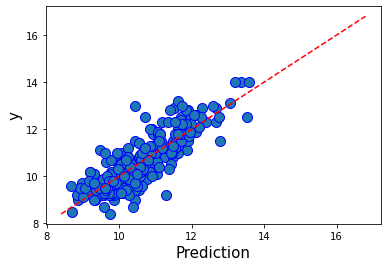

In [120]:
#exibindo os dados originais X dados preditos
fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)

In [121]:
#R2 do modelo
R2 = r2_score(y_test, y_pred)
print('R2:', R2)

R2: 0.7228300454815506


###*Método 4.1: Ridge Regression*

In [129]:
# ajusta o modelo ridge regression
ridge2 = Ridge(alpha = 0, normalize = True, random_state=42)
ridge2.fit(x_train, y_train)             # Fit a ridge regression on the training data
y_pred = ridge2.predict(x_test)           # Use this model to predict the test data
RSME = mean_squared_error(y_test, y_pred)
print("RSME:", RSME)          # Calculate the test MSE

RSME: 0.34505667178498856


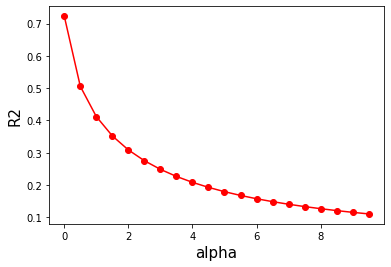

In [130]:
#verificando o melhor valor de alpha
vR2 = []
valpha = []
# variamos os valores de alpha
for alpha in np.arange(0,10,0.5):
    ridge2 = Ridge(alpha = alpha, normalize = True)
    ridge2.fit(x_train, y_train)            
    y_pred = ridge2.predict(x_test)           
    r2 = r2_score(y_test, y_pred)
    vR2.append(r2)
    valpha.append(alpha)
plt.plot(valpha, vR2, '-ro')
plt.xlabel("alpha", fontsize=15)
plt.ylabel("R2", fontsize=15)
plt.show(True)

###*Método 4.2: Lasso Regression*

In [125]:
#aplicando o validação via Lasso
alpha = 0.1
lasso = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
lasso.fit(x_train, y_train)             # Fit a ridge regression on the training data
y_pred = lasso.predict(x_test)           # Use this model to predict the test data
RSME = mean_squared_error(y_test, y_pred)         # Calculate the test MSE
print('RSME:', RSME)

RSME: 1.2455234811845255


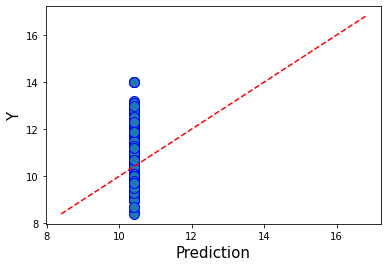

In [126]:
#verificando dados originais X preditos
fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("Y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show()

In [127]:
#R2 do modelo
R2 = r2_score(y_test, y_pred)
print("R2:", R2)   

R2: -0.00047822534696551067


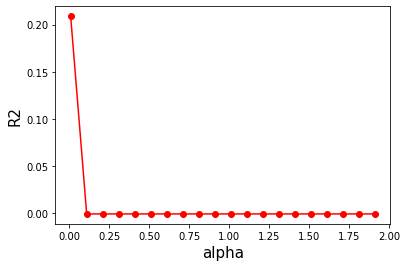

In [128]:
#verificando o melhor valor de alpha
vR2 = []
valpha = []
for alpha in np.arange(0.01,2,0.1):
    lasso = Lasso(alpha = alpha, normalize = True)
    lasso.fit(x_train, y_train)             # Fit a ridge regression on the training data
    y_pred = lasso.predict(x_test)           # Use this model to predict the test data
    r2 = r2_score(y_test, y_pred)
    vR2.append(r2)
    valpha.append(alpha)
plt.plot(valpha, vR2, '-ro')
plt.xlabel("alpha", fontsize=15)
plt.ylabel("R2", fontsize=15)
plt.show(True)

In [162]:
#repetir esse código para cada novo treino de modelo
#criação do dataframe e armazenamento na variável 'data'
data = pd.read_csv('winequality-red.csv')

#exibindo as primeiras linhas e outras informações sobre o dataset
attributes = list(data.columns)
print('Rótulos das colunas:',attributes)
print("Número de linhas e colunas no dataset:", data.shape)
data.head()

#transformando o DataFrame em Numpy Array para melhor manipulação e transformação dos dados
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

classes = np.unique(y)

#normalização dos dados para evitar o efeito da escala nos atributos numéricos do dataset
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

#separando dados de treino e teste, com fração de elementos em 80% para treino e 20% para teste
p = 0.2
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

Rótulos das colunas: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
Número de linhas e colunas no dataset: (1599, 12)


## 4. Conclusão

Ao tentar classificar a qualidade do vinho, usando todas as classes (1 a 8), não obtive resultados muito favoráveis com nenhum dos modelos utilizados. A análise de PCA demonstrou que existem muitos atributos importantes, sendo que 7 atributos são responsáveis pela variância dos dados. No entanto, ao reduzir os índices de qualidade a um problema de apenas 2 classes (0,1), os scores melhoraram significativamente com a aplicação do modelo SVM.

No caso da regressão, que tenta prever a quantidade de álcool nas amostras, o melhor R² obtido foi com a utilização de regressão linear simples. Em comparação com a utilização de Lasso e Ridge, o melhor alpha é igual a 0, o que ajuda a corroborar com a afirmação de que a regressão linear simples é o modelo mais adequado para esse caso. 

